In [77]:
import pandas as pd
import geopandas as gpd

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import plotly.express as px

df = pd.read_csv(f'/content/drive/My Drive/Mantises!/data/ACSDT5Y2020.B01003-Data.csv')

Mounted at /content/drive


In [79]:
df1 = df.set_index('County')
df1.loc['Alameda', 'Population Total']

1661584

In [83]:
gdf_3 = gpd.read_file(f'/content/drive/My Drive/Mantises!/data/gadm41_USA_shp/gadm41_USA_2.shp')
gdf_3 = gdf_3[(gdf_3['NAME_1'] == 'California') & (gdf_3['TYPE_2'] == 'County')]
gdf_3 = gdf_3[['NAME_2', 'geometry']]
gdf_3['population_total'] = gdf_3.apply(lambda row: df1.loc[row['NAME_2'], 'Population Total'], axis=1)

In [84]:
gdf_3

,NAME_2,geometry,population_total
183,Alameda,"MULTIPOLYGON (((-121.99055 37.46256, -121.9907...",1661584
184,Alpine,"POLYGON ((-120.07266 38.51175, -120.07193 38.5...",1159
185,Amador,"POLYGON ((-120.07414 38.70165, -120.07320 38.6...",39023
186,Butte,"POLYGON ((-121.90864 39.30519, -121.90672 39.3...",223344
187,Calaveras,"POLYGON ((-120.07266 38.51175, -120.07199 38.5...",45828
188,Colusa,"POLYGON ((-121.88808 39.38493, -121.88734 39.3...",21491
189,Contra Costa,"POLYGON ((-122.31773 37.89746, -122.31839 37.8...",1147788
190,Del Norte,"MULTIPOLYGON (((-123.53883 41.98751, -123.5392...",27692
191,El Dorado,"POLYGON ((-119.90250 38.93323, -119.90025 38.9...",190345
192,Fresno,"POLYGON ((-120.91826 36.74143, -120.91035 36.7...",990204


In [85]:
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy
!pip install geoplot

import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libproj-dev is already the newest version (8.2.1-1).
proj-bin is already the newest version (8.2.1-1).
proj-data is already the newest version (8.2.1-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgeos-dev is already the newest version (3.10.2-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


<ipython-input-98-47fe819f4db6>:5: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(bar_info)


<Axes: >

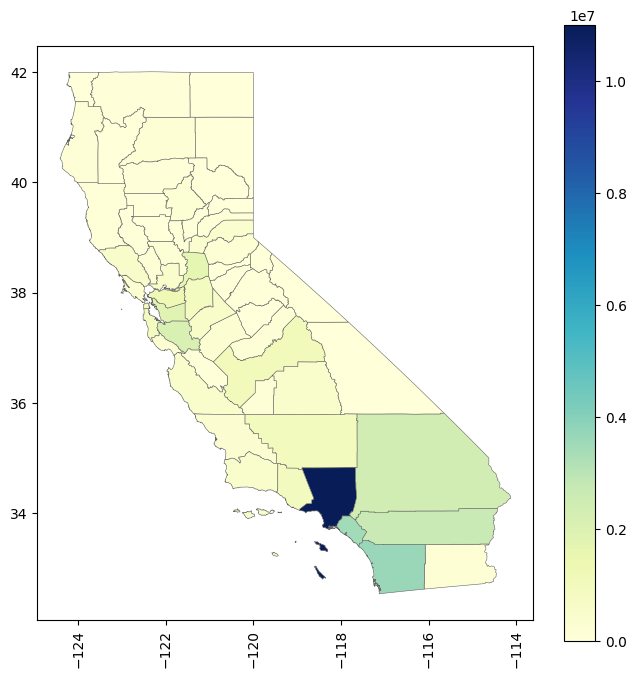

In [98]:
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
bar_info = plt.cm.ScalarMappable(cmap="YlGnBu", norm=plt.Normalize(vmin=0, vmax=11000000))
bar_info._A = []
cbar = fig.colorbar(bar_info)
gdf_3.plot(column="population_total", cmap="YlGnBu", linewidth=0.4, ax=ax, edgecolor=".4")